# LCRTest1

## Setup and Data

In [453]:
# Imports functions into the program
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#These are imported specifically for the use of the histogram.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [454]:
# Changes Directory to get LCR Data
os.getcwd()
os.chdir('/Users/glatiolait/Documents/LCR/LCR_files+scripts')
print(os.getcwd())

/Users/glatiolait/Documents/LCR/LCR_files+scripts


In [455]:
# Imports Feb2023.csv data into a table. 
# Was unsure how to get this data to display neatly. This was solved with the pd.DataFrame function.
table = "new_db_Feb2023.csv"
opened = open(table, "r")
readed = pd.read_csv(table, sep=",")

In [456]:
tablelist = list(csv.reader(readed))
data_array = np.array(readed)

In [457]:
df = pd.DataFrame(data_array)
df

,0,1,2,3,4,5,6,7,8,9
0,0,4FGL J0001.2-0747,daily,239587201,239846401,0.0,0.0,2.18,0.0,2.44
1,1,4FGL J0001.5+2113,daily,239587201,239846401,NaN,NaN,NaN,0.0,0.52
2,2,4FGL J0003.3-1928,daily,239587201,239846401,NaN,NaN,NaN,102.0,-0.0
3,3,4FGL J0004.3+4614,daily,239587201,239846401,NaN,NaN,NaN,102.0,-0.0
4,4,4FGL J0004.4-4737,daily,239587201,239846401,0.0,0.0,2.97,0.0,8.93
...,...,...,...,...,...,...,...,...,...,...
4132745,4132745,4FGL J2358.0-4601,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN
4132746,4132746,4FGL J2358.3-1021,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN
4132747,4132747,4FGL J2358.3+3830,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN
4132748,4132748,4FGL J2359.0+3922,weekly,698630401,699235201,NaN,NaN,NaN,NaN,NaN


In [458]:
## np.where creates a Numpy Array where the input columns or rows are filtered for
## the value specificed after the '=='. Here I have filtered the array to only display
## the 'daily' source values.
dailysort = np.where(data_array[:,2]=='daily')
pd.DataFrame(data_array[dailysort])

,0,1,2,3,4,5,6,7,8,9
0,0,4FGL J0001.2-0747,daily,239587201,239846401,0.0,0.0,2.18,0.0,2.44
1,1,4FGL J0001.5+2113,daily,239587201,239846401,NaN,NaN,NaN,0.0,0.52
2,2,4FGL J0003.3-1928,daily,239587201,239846401,NaN,NaN,NaN,102.0,-0.0
3,3,4FGL J0004.3+4614,daily,239587201,239846401,NaN,NaN,NaN,102.0,-0.0
4,4,4FGL J0004.4-4737,daily,239587201,239846401,0.0,0.0,2.97,0.0,8.93
...,...,...,...,...,...,...,...,...,...,...
2703820,4131220,4FGL J2358.0-4601,daily,698889601,699148801,NaN,NaN,NaN,NaN,NaN
2703821,4131221,4FGL J2358.3-1021,daily,698889601,699148801,NaN,NaN,NaN,NaN,NaN
2703822,4131222,4FGL J2358.3+3830,daily,698889601,699148801,NaN,NaN,NaN,NaN,NaN
2703823,4131223,4FGL J2359.0+3922,daily,698889601,699148801,NaN,NaN,NaN,NaN,NaN


## Plotting Data

In [1]:
## Multiple conditions filter first for the name of a source, and then for the specific cadence of a point.
source1 = np.where((data_array[:,1] == '4FGL J0001.2-0747') & (data_array[:,2] == 'daily') & (data_array[:,-1] >= 4) & (data_array[:,6] < data_array[:,5]))
GraphTest = (data_array[source1])
Plot = pd.DataFrame(GraphTest)

NameError: name 'np' is not defined

In [460]:
# Defines y as the number of our data points, and x as the number of years since mission start.

ysize = Plot.size
x = pd.DataFrame(GraphTest[:,3]/(60*60*24*365))

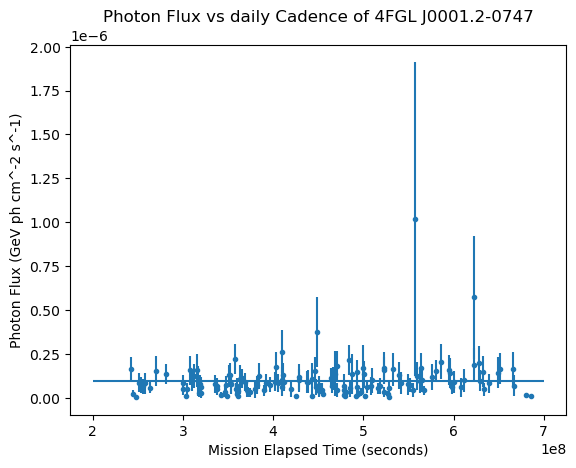

In [461]:
# This block of code is where a majority of the plots will go.

# The title displays the name of the graph, with references that will vary the cadence and name of the source.
plt.title("Photon Flux vs " +GraphTest[0,2]+ " Cadence of "+GraphTest[0,1])

# The x-axis displays the time elapsed in seconds. I would like to convert this to be a range of years.
plt.xlabel("Mission Elapsed Time (seconds)")

# The y-axis displays the Photon Flux. I don't believe the numerical labels are correct, but the shape of the graph appears to be correct.
# I am unsure why.
plt.ylabel("Photon Flux (GeV ph cm^-2 s^-1)")

# This is the actual function that plots the data. At the moment, it plots column 3 (Time) vs column 5 (Photon Flux)
#Graph = plt.plot(Plot[3],Plot[5])
plt.errorbar(Plot[3],Plot[5],yerr=Plot[6],fmt = '.')
plt.hlines(np.mean(GraphTest[:,5]),2e8,7e8)

In [462]:
# This section was for testing different functions regarding GraphTest and pulling specific elements.
#GraphTest.shape

In [463]:
## Displays the years since mission start. 
## I do not believe this to be integral to the program, as I am unsure as to how to use this.

pd.DataFrame((GraphTest[:,3]/(60*60*24*365)))

,0
0,7.679452
1,7.753425
2,7.843836
3,7.950685
4,8.049315
...,...
139,20.657534
140,21.10137
141,21.167123
142,21.569863


In [464]:
#This creates a filter array of Boolean values. 
#For this specific instance, I am filtering out all rows in which the photonflux is less than 1.
phtnminfilter = np.where(data_array[:,5] > 0)

#By applying the filter array to the main array, the rows that did not meet the criteria are now omitted.
photonminimum = (data_array[phtnminfilter])
dfphtn = pd.DataFrame(photonminimum)

In [465]:
#This would sort the values alphabetically. Column 1 is the name of each source. This would group all data of each source together.
dfphtn.sort_values(by=[1])

,0,1,2,3,4,5,6,7,8,9
0,0,4FGL J0001.2-0747,daily,239587201,239846401,0.0,0.0,2.18,0.0,2.44
468232,1024801,4FGL J0001.2-0747,weekly,353289601,353894401,0.0,0.0,2.17,0.0,10.02
468231,1024800,4FGL J0001.2-0747,daily,353635201,353894401,0.0,0.0,2.21,0.0,5.95
1650948,3707275,4FGL J0001.2-0747,weekly,651456001,652060801,0.0,0.0,3.39,102.0,3.19
466555,1021751,4FGL J0001.2-0747,monthly,351043201,353635201,0.0,0.0,2.05,0.0,14.26
...,...,...,...,...,...,...,...,...,...,...
1084479,2397298,4FGL J2359.2-3134,daily,506044801,506304001,0.0,0.0,1.8,0.0,27.08
605183,1328273,4FGL J2359.2-3134,daily,387072001,387331201,0.0,0.0,2.63,0.0,3.97
803112,1775099,4FGL J2359.2-3134,daily,436838401,437097601,0.0,0.0,5.57,102.0,6.68
1712776,3847574,4FGL J2359.2-3134,daily,667267201,667526401,0.0,0.0,2.27,0.0,2.57


In [466]:
#Makes an array of zeros equal to the length of the source1 array, and changes a zero to be a 1 if the source's flux is above the given threshold. 
#This is useable for all time sections.
base = np.zeros(len(factor))
print(base)
print()
base[GraphTest[:,5]>np.mean(GraphTest[:,5])]=1

print(base)
print()

#Loop counts every time a given source goes above the threshold given. Each element in the array is an individual source measurement.
#Each element says how many time bins the source was above the threshold.

i = 0
k = 0
empty_array = [0]
while i < len(base):
    if (base[i] == 0) and (base[i-1]) == 1:
        empty_array.append(0)
        k+=1
    elif base[i] == 1:
        empty_array[k] += 1
    i+=1
    
i=0
print(len(empty_array))
print()
empty_array

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]

29



[1,
 2,
 4,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 5,
 5,
 6,
 3,
 0]

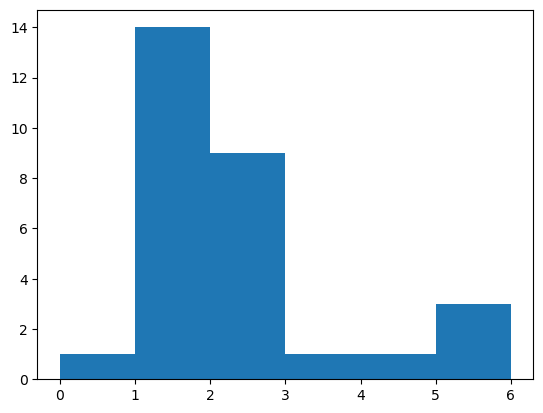

In [467]:
y, x_edges, patches = plt.hist(empty_array, bins = max(empty_array))

In [468]:
print(y)

[ 1. 14.  9.  1.  1.  3.]


In [469]:
print(x_edges)

[0. 1. 2. 3. 4. 5. 6.]


In [470]:
print(np.mean(GraphTest[:,5]))

9.801020833333335e-08


In [471]:
factor = GraphTest[:,5]/np.mean(GraphTest[:,5])

In [542]:
#copy of previous loop, except instead of 1, each element in the zero array will be a multiple of the average.
factor = GraphTest[:,5]/np.mean(GraphTest[:,5])
base = np.zeros(len(factor))
print(base)
print()
base[factor>1] = 1

print(base)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]


In [473]:
max(factor)

10.407079194556687

In [474]:
factor

array([1.6834981050018172, 0.24487245163662794, 0.08090993922826915,
       0.8917438447100534, 0.7764497320644744, 0.6774804495280039,
       0.8448099581463664, 0.5825923745188106, 1.5610618791835031,
       1.387610559274225, 0.8631753920191135, 0.5183133559641958,
       0.11733471640921755, 0.5142321484369187, 1.6120769732744673,
       1.020301881819283, 1.2753773522741039, 1.6018739544562743,
       0.9917334291283431, 0.26425818739119433, 0.81113999604633,
       0.31221237583670064, 0.6274856573188591, 0.8029775809917757,
       0.6948255815189317, 0.515252450318738, 0.16630920673654315,
       0.3642477718094841, 0.7580842981917273, 0.0872358108955487,
       1.3570015028196467, 1.3467984840014535, 0.8029775809917757,
       0.7999166753463179, 2.2548671588206157, 0.5162727522005572,
       0.20712128200931446, 0.6887037702280161, 0.1254971314637718,
       0.4071004508458939, 1.0713169759102472, 1.1325350888194041,
       0.940718335037379, 0.4570952430550388, 0.325476300300

In [475]:
factor[116]

10.407079194556687

In [476]:
pd.DataFrame(np.where(factor>10))

,0
0,116


In [ ]:
# This is the big loop that processes the entire database. It performs an evaluation of the flux for each source at each time bin.
# The inner loop creates a time-domain array of how far above or below the average flux that the flux at each time bin.
# It then takes this array, and adds it to a list of each source name. Associated with each source is also the average flux, which was used in reference to the factor array.
# This is repeated for all sources, which at the moment is about 1500+.
# The name of the final DataFrame that contains all of this info is a placeholder. I will most likely change it when the time comes to present the code.
# (data_array[:,6] < data_array[:,5])
names = df.drop_duplicates(subset=[1], inplace=False)[1]
data_array = (data_array[np.where((data_array[:,2]==cadence))])
Esras = []
sourcenumber = 0
matrix = []
for name in names:
    print(name)
    source_array = (data_array[np.where(data_array[:,1] == name)])
    base = np.zeros(len(source_array))
    averageflux = np.nanmean(source_array[:,5])
    #print(averageflux)
    factors = source_array[:,5]/averageflux
    emptyarray = [0]
    #print(names[sourcenumber])
    #print(factors)
    #j = 0
    #k = 0
    
    #while j < len(base):
    #    if (factors[j] < 1): # and (factors[j-1]) > 0
    #        emptyarray.append(0)
    #        k+=1   
    #    elif factors[j] > 1:
    #        emptyarray[k] = 1
    #    j+=1
    base[factors>1] = 1
    print(base)
    #for j in range(0,len(base)):
    #    if factors[j] < 1: # and (factors[j-1]) > 0
    #        emptyarray.append(0)
    #    
    #    elif factors[j] > 1:
    #        emptyarray.append(1)
    #print(emptyarray)
    matrix.append(base)
    Esras.append((names[sourcenumber],base,averageflux))
    sourcenumber += 1
pd.DataFrame(Esras)